# Lista de Exercícios XI

* Aluno : Gabriel Wendell Celestino Rocha
* Matrícula :  20190112149 

* Disciplina : Física Computacional I
* Professor : Leonardo Machado
* Data de Entrega : 11/12/2020

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

%matplotlib notebook

## Problema 1

### Letra a)

Considere as duas equações diferenciais de 2ª ordem:

$$\frac{d^{2}x}{dt^{2}}=-GM\frac{x}{r^{3}}\text{ }\text{ }\text{;}\text{ }\text{ }\frac{d^{2}y}{dt^{2}}=-GM\frac{y}{r^{3}}$$

onde $r=\sqrt{x^{2}+y^{2}}$. Podemos transformar essas duas equaçôes de 2ª ordem em quatro equações de 1ª ordem cada. Para isso, basta usarmos as seguintes substituições:

$$\frac{dx}{dt}=\chi\text{ }\text{ };\text{ }\text{ }\frac{dy}{dt}=\gamma\implies$$

$$\therefore\text{ }\text{ }\boxed{\frac{d\chi}{dt}=-GM\frac{x}{(x^{2}+y^{2})^{3/2}}}\text{ }\text{ }\text{;}\text{ }\text{ }\boxed{\frac{d\gamma}{dt}=-GM\frac{y}{(x^{2}+y^{2})^{3/2}}}$$

$\blacksquare$

### Letra b)

Inicialmente, vamos definir algumas constantes que serão usadas no problema:

In [2]:
m_sun = 1.989 * 10 ** 30       # [kg]
G = 66374.2                    # [m^3/kg*yr^2]
x_0 = 4 * 10 ** 12             # [m]
y_0 = 0
v_x = 0
v_y = 15768000000              # [m/ano]
t_0 = 0
t_f = 165                      # [anos]

Agora definimos o valor de `N` e `h`:

In [3]:
N = 200000
h = (t_f - t_0) / N

print('O valor de h usado é de', h)

O valor de h usado é de 0.000825


Definimos nossa função principal `f(r,t)`:

In [4]:
def f(r,t):
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    dist = np.sqrt(x ** 2 + y ** 2)
    
    return np.array([vx, -G*m_sun*x/dist**3, vy, -G*m_sun*y/dist**3], float)

Como restrição exigida no enunciado da questão, usamos aqui um passo de tempo fixo:

In [5]:
tpoints = np.arange(t_0, t_f, h)
xpoints = []
ypoints = []

r = np.array([x_0, v_x, y_0, v_y], float)

Aqui implementamos o método de Runge-Kutta de 4ª ordem (RK4). Vamos usar a função `time.time()` para medir o tempo de execução desta célula:

In [6]:
start = time.time()

for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[2])
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
end = time.time()

print('O tempo de execução foi de', (end-start), 's')

O tempo de execução foi de 7.897136449813843 s


Como de costume, definimos uma função para melhorar a estética dos plots:

In [7]:
def opt_plot():
    plt.grid(True, linestyle=':', color='0.50')
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,labelsize=15)

Por fim, vamos ao plot:

<IPython.core.display.Javascript object>


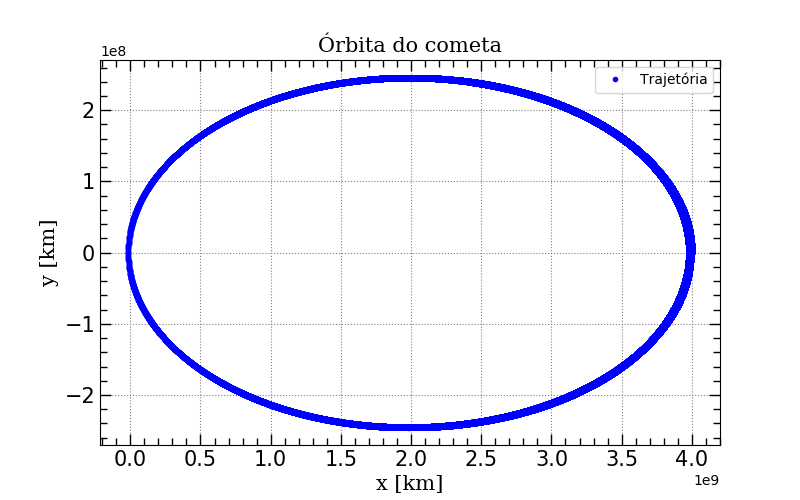

In [8]:
plt.figure(figsize=(8,5))

plt.plot(np.array(xpoints, float)/1000, np.array(ypoints, float)/1000, '.', color='blue', label='Trajetória')
plt.title('Órbita do cometa', family='serif', fontsize=15)
plt.xlabel('x [km]', family='serif', fontsize=15)
plt.ylabel('y [km]', family='serif', fontsize=15)
plt.legend(loc='best')
opt_plot()

Note que como as órbitas são periódicas, as órbitas sucessivas se sobrepõem umas sobre as outras. Como foi mostrado na célula 3, o valor usado $h=0.000825$. Como pode ser visto na célula 6, o tempo de execução do método de Runge-Kutta de 4ª ordem, nesse caso, foi de $7.897136449813843$ segundos, ou seja, cerca de $7.9$ segundos. Ao analisar a simulação da órbita do cometa feita acima, nota-se que a sua órbita é eliptíca cujo um dos focos é ocupado pelo Sol, o que já era esperado de acordo com as leis de Kepler.

### Letra c)

Vamos determinar a órbita do cometa usando um passo de tempo adaptativo. Primeiramente, definimos uma função chamada `time_step()` que irá implementar esse método:

In [9]:
def time_step(r, t, h):
    def runge_kutta_step(r, t, h):
        '''
        - param r: posições e velocidades atuais
        - param t: valor atual de t
        - param h: tamanho do passo
        
        - return: um vetor da mudança nas posições e velocidades para chegar a t + h
        '''
        k1 = h * f(r, t)
        k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
        k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
        k4 = h * f(r + k3, t + h)
        
        return (k1 + 2 * k2 + 2 * k3 + k4) / 6

    
    # Realizamos 2 etapas do RK4 com um passo de tamanho h:
    delta_step_1 = runge_kutta_step(r, t, h)
    delta_step_2 = runge_kutta_step(r + delta_step_1, t + h, h)
    delta_r1 = delta_step_1 + delta_step_2

    # Realizamos 1 etapa do RK4 com um passo de tamanho 2h:
    delta_r2 = runge_kutta_step(r, t, 2 * h)

    
    # Computa a estimativa do erro
    delta_x1 = delta_r1[0]
    delta_x2 = delta_r2[0]
    delta_y1 = delta_r1[2]
    delta_y2 = delta_r2[2]
    
    error = np.sqrt((delta_x1 - delta_x2) ** 2 + (delta_y1 - delta_y2) ** 2) / 30

    
    # Calcula rho
    rho = h*delta/error

    # Calcula o fator para multiplicar h por
    factor = np.power(rho, 1 / 4)

    # Atualiza h de acordo
    # Se a precisão desejada for atingida, vá para a próxima etapa
    if  rho >= 1:
        # Atualiza t
        t = t + 2 * h

        # Evita que h fique muito grande
        if factor > 2:
            h *= 2
        else:
            h *= factor

        # Use extrapolação local para melhorar nossa estimativa das posições
        delta_r1[0] += (delta_x1 - delta_x2) / 15
        delta_r1[2] += (delta_y1 - delta_y2) / 15
        
        return delta_r1, h, t
    
    # Se a precisão da meta não for atingida, deve-se refazer a etapa com h menor
    else:
        return time_step(r, t, factor * h)

Agora definimos nosso $\delta$ e nosso $h$ inicial:

In [10]:
delta = 1000               # precisão alvo por intervalo de unidade em [m/ano]
h = (t_f - t_0) / 150000   # tamanho do passo inicial

print('O valor de h usado é de', h)

O valor de h usado é de 0.0011


Definimos alguns arrays vázios onde iremos armazenar nossos dados:

In [11]:
tpoints = []
xpoints2 = []
ypoints2 = []

Estabelecemos as condições iniciais:

In [12]:
r = np.array([x_0, v_x, y_0, v_y], float) 
t = t_0

Agora realizamos o laço:

In [14]:
start = time.time()

while(t < t_f):
    tpoints.append(t)
    xpoints2.append(r[0])
    ypoints2.append(r[2])
    
    delta_r, h, t = time_step(r, t, h)
    r += delta_r
    
end = time.time()

print('O tempo de execução foi de', (end-start), 's')

O tempo de execução foi de 0.0 s


Por fim, vamos ao plot:

<IPython.core.display.Javascript object>


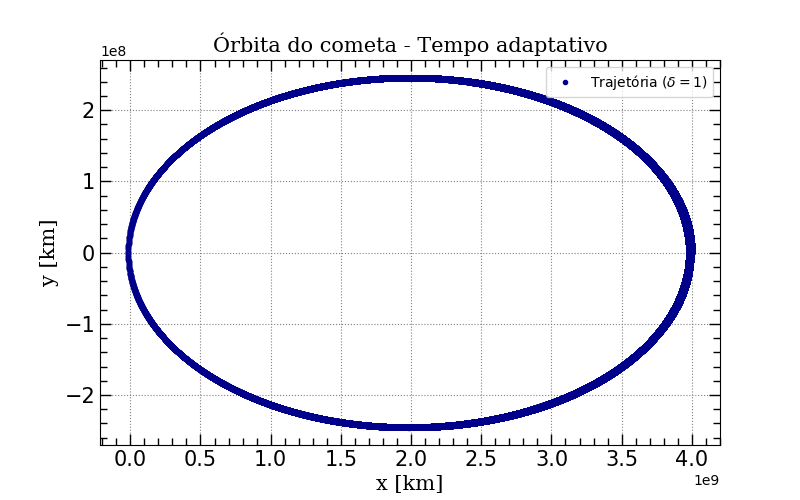

In [15]:
plt.figure(figsize=(8,5))

plt.plot(np.array(xpoints, float)/1000, np.array(ypoints, float)/1000, '.', color='darkblue', label=r'Trajetória ($\delta=1$)')
plt.title('Órbita do cometa - Tempo adaptativo', family='serif', fontsize=15)
plt.xlabel('x [km]', family='serif', fontsize=15)
plt.ylabel('y [km]', family='serif', fontsize=15)
plt.legend(loc='best')
opt_plot()

Nota-se que utilizando um passo de tempo adaptativo, a velocidade de execução foi muito menor que na **letra b)**, o tempo de execução foi de $t=0.3532700538635254\approx0.35$ segundos (quando roda a célula pela 1ª vez, a partir da 2ª vez o resultado sempre se torna 0.0 segundos - processo praticamente instantâneo), ou seja, cerca de 1/3 de segundo, logo, a execução foi muito mais rápida do que na **letra b)**. A precisão foi relativamente maior que a obtida na **letra b)**. Além disso, o tamanho do passo $h=0.0011$ foi maior do que o que foi utilizado na **letra b)** que foi $h=0.000825$.

### Letra d)

Para plotarmos um gráfico com a posição do cometa em cada passo do RK4 ao redor de uma única órbita, basta restrigirmos os pontos a serem plotados. Primeiramente, vamos plotar uma órbita completa usando os arrays `xpoints2` e `ypoints2` e em seguida plotar a mesma órbita apenas restrigindo o número de pontos a serem plotados. Isso pode ser feito da seguinte forma:

<IPython.core.display.Javascript object>


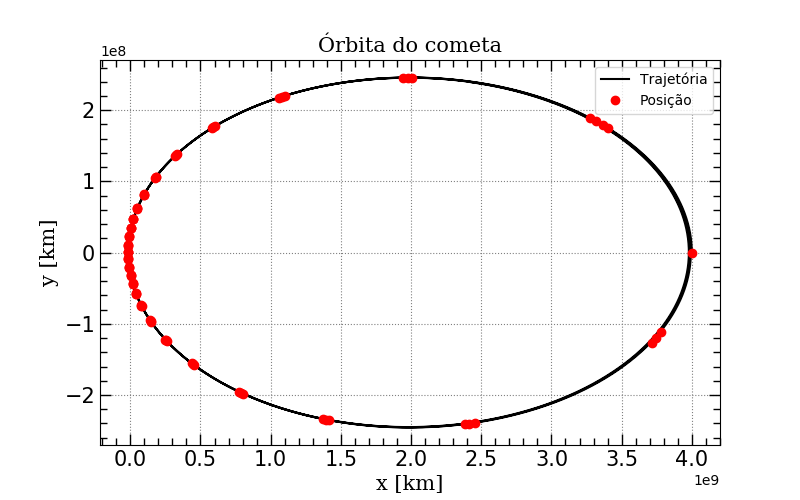

In [16]:
plt.figure(figsize=(8,5))

plt.plot(np.array(xpoints, float) / 1000, np.array(ypoints, float) / 1000, 'black', label='Trajetória')
plt.plot(np.array(xpoints2, float)[::20] / 1000, np.array(ypoints2[::20], float) / 1000, 'ro', label='Posição')
plt.title('Órbita do cometa', family='serif', fontsize=15)
plt.xlabel('x [km]', family='serif', fontsize=15)
plt.ylabel('y [km]', family='serif', fontsize=15)
plt.legend(loc='best')
opt_plot()

Note que quanto mais próximo do periélio mais próximo os passos serão e quanto mais próximo do afélio, mais distantes estarão os passos. Isso era esperado já que no periélio a velocidade orbital é maior do que a velocidade orbital no afélio.

$\text{ }$

## Problema 2

Considere a equação diferencial abaixo:

$$\frac{d^{2}x}{dt^{2}}-\Bigg(\frac{dx}{dt}\Bigg)^{2}+x+5=0$$

Vamos aplicar o método de Leapfrog para resolver a equação diferencial acima de $t=0$ até $t=50$ com passos de $h=0.001$. As condições iniciais serão $x=1$ e $\frac{dx}{dt}=0$.

Vamos começar definindo algumas constantes:

In [17]:
h = 0.001
x_0 = 1
x_prime_0 = 0
t_0 = 0
t_f = 50

Agora definimos a nossa função principal `f(r)`:

In [18]:
def f(r):
    x = r[0]
    v = r[1]
    
    return np.array([v, v**2-x-5], float)

Agora definimos um array vazio para armazenar os valores de $x$, definimos os valores de $t$ e $r$:

In [19]:
tpoints = np.arange(t_0, t_f, h)
xpoints = []

r = np.array([x_0, x_prime_0], float)

Agora implementamos o método de Leapfrog:

In [20]:
for t in tpoints:
    xpoints.append(r[0])
    
    r_mid = r + 0.5 * h * f(r)
    r += h * f(r_mid)

Por fim vamos ao plot:

<IPython.core.display.Javascript object>


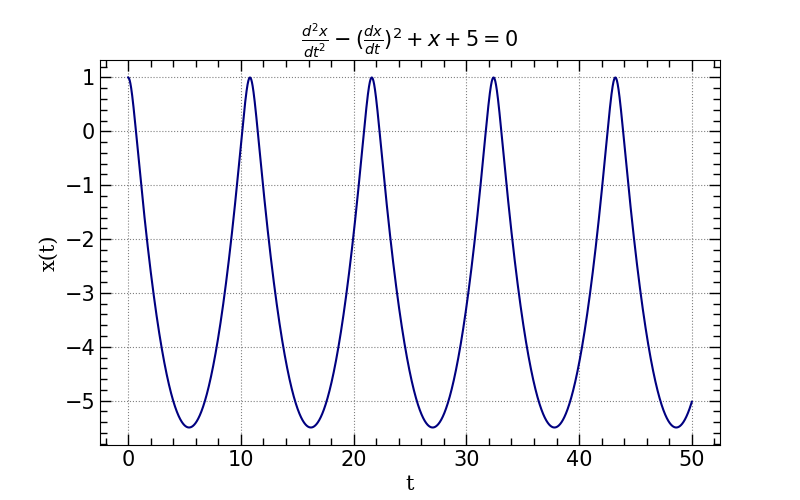

In [21]:
plt.figure(figsize=(8,5))

plt.plot(tpoints, xpoints, color='navy', label=r'$x(t)$')
plt.title(r'$\frac{d^{2}x}{dt^{2}}-(\frac{dx}{dt})^{2}+x+5=0$', family='serif', fontsize=15)
plt.xlabel('t', family='serif', fontsize=15)
plt.ylabel('x(t)', family='serif', fontsize=15)
opt_plot()

$\text{ }$

## Problema 3

### Letra a)

Vamos usar o método de Verlet para determinar a órbita da Terra em torno do Sol com um passo $h=1$ hora. As equações de movimento são análogas às do cometa abordado no **problema 1**, ou seja, é do tipo $\textbf{r}=(x,y)$ cuja forma vetorial é:

$$\frac{d^{2}\textbf{r}}{dt^{2}}=-GM\frac{\textbf{r}}{r^{3}}$$

Comecemos definindo as constantes que serão usadas no problema:

In [22]:
G = 6.6738e-11
M = 1.9891e30               # Massa do Sol [kg]
m = 5.9722e24               # Massa da Terra [kg]

x_initial = 1.4710e11       # Distância da Terra até o periélio [m]
y_initial = 0 

vx_initial = 0
vy_initial = 3.0287e4       

Definimos agora os tempos iniciais e finais e o nosso passo $h$:

In [23]:
t_start = 0
t_end = 1.577e8   # 5 anos [s] 
h = 3600           

Definimos a nossa função principal `f(r)`:

In [24]:
def f(r):
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    drdt = -G*M * 1 / (np.sqrt(x**2 + y**2))**3
    
    return np.array([vx, drdt*x, vy, drdt*y], float)

Agora definimos os arrays para as coordenadas $x$ e $y$, para o tempo $t$ e para a posição $\textbf{r}$:

In [25]:
t_points = np.arange(t_start, t_end, h)
x_points = []
y_points = []

r = np.array([x_initial, vx_initial, y_initial, vy_initial], float)

Primeiro executamos meio passo para calcular `v(t+0.5h)` para $x$ e $y$:

In [26]:
f_half = 0.5*h*f(r)
vx_half = r[1] + f_half[1]
vy_half = r[3] + f_half[3]

Agora realizamos um loop pelas equações:

In [27]:
for t in t_points:
    x_points.append(r[0])
    y_points.append(r[2])

    r[0] += h*vx_half
    r[2] += h*vy_half
    k = h * f(r)
    
    r[1] = vx_half + 0.5*k[1]
    r[3] = vy_half + 0.5*k[3]
    f_half = 0.5*h*f(r)
    
    vx_half += k[1]
    vy_half += k[3]

Por fim plotamos a órbita:

<IPython.core.display.Javascript object>


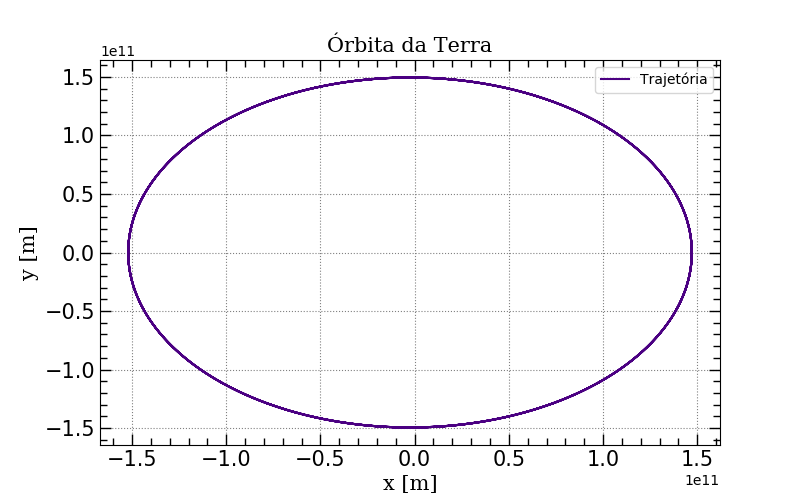

In [28]:
plt.figure(figsize=(8,5))

plt.plot(x_points, y_points, color='indigo', label='Trajetória')
plt.title('Órbita da Terra', family='serif', fontsize=15)
plt.xlabel('x [m]', family='serif', fontsize=15)
plt.ylabel('y [m]', family='serif', fontsize=15)
plt.legend(loc='best')
opt_plot()

### Letra b)

Vamos criar dois arrays vazios para armazenamento de valores para as energias cinética e potencial:

In [29]:
potential = []
kinetic = []

Analogamente ao item anterior, executamos metade de um passo para calcular `v(t+0.5h)` para $x$ e $y$:

In [30]:
f_half = 0.5*h*f(r)

vx_half = r[1] + f_half[1]
vy_half = r[3] + f_half[3]

Agora realizamos o loop através das equações:

In [31]:
for t in t_points:
    x_points.append(r[0])
    y_points.append(r[2])

    potential.append(-G*M*m / np.sqrt(r[0]**2 + r[2]**2))
    kinetic.append(0.5*m* (r[1]**2 + r[3]**2))
    
    r[0] += h*vx_half
    r[2] += h*vy_half
    k = h * f(r)
    
    r[1] = vx_half + 0.5*k[1]
    r[3] = vy_half + 0.5*k[3]
    f_half = 0.5*h*f(r)
    
    vx_half += k[1]
    vy_half += k[3]

Adicionamos as energias cinética e potencial para obter a energia total:

In [32]:
total = np.array(potential, float) + np.array(kinetic, float)

Por fim, plotamos as energias potencial, cinética e a total todas de uma vez:

<IPython.core.display.Javascript object>


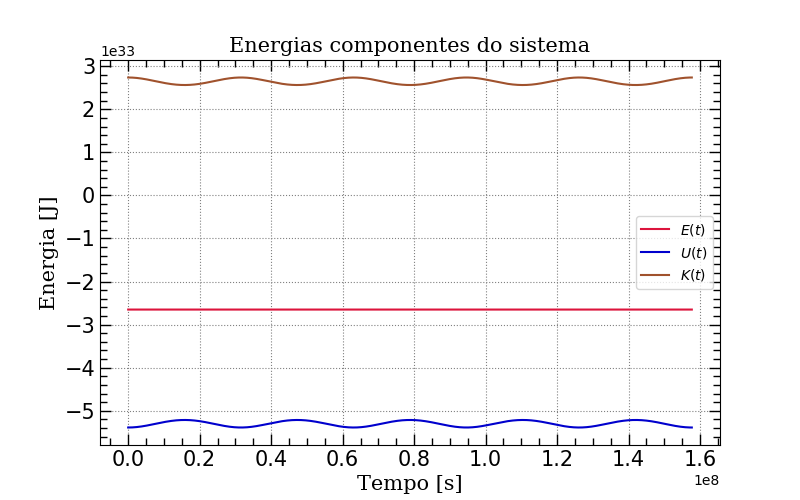

In [33]:
plt.figure(figsize=(8,5))

plt.plot(t_points, total, color='crimson', label=r'$E(t)$')
plt.plot(t_points, potential, color='mediumblue', label=r'$U(t)$')
plt.plot(t_points, kinetic, color='sienna', label=r'$K(t)$')
plt.title('Energias componentes do sistema', family='serif', fontsize=15)
plt.xlabel('Tempo [s]', family='serif', fontsize=15)
plt.ylabel('Energia [J]', family='serif', fontsize=15)
plt.legend(loc='best')
opt_plot()

Note que apesar de as energias cinética e potencial estarem variando com o tempo, a energia total do sistema se conserva, permanecenco assim constante.

### Letra c)

Agora vamos plotar apenas a energia total para que possamos ver que de fato ela oscila:

<IPython.core.display.Javascript object>


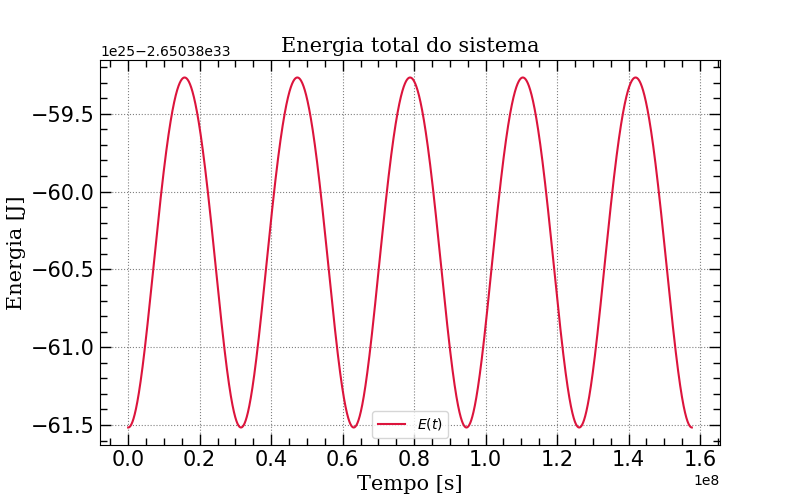

In [34]:
plt.figure(figsize=(8,5))

plt.plot(t_points, total, color='crimson', label=r'$E(t)$')
plt.title('Energia total do sistema', family='serif', fontsize=15)
plt.xlabel('Tempo [s]', family='serif', fontsize=15)
plt.ylabel('Energia [J]', family='serif', fontsize=15)
plt.legend(loc='best')
opt_plot()

Note que a energia total retorna ao seu valor inicial após o termino de cada órbita executada.

$\text{ }$

## Problema 4

Vamos começar definindo algumas constantes que serão utilizadas ao longo do problema:

In [35]:
m = 1
R = 0.08
d_target = 200
eps = 0.1
rho = 1.22
C = 0.47
vx = 100
g = 9.81

As equações que descreve o movimento da bala de canhão, levando em consideração a resistência do ar, são:

$$\ddot{x}=-\frac{\pi R^{2}\rho C}{2m}\cdot\dot{x}\sqrt{\dot{x}^{2}+\dot{y}^{2}}\text{ }\text{ }\text{;}\text{ }\text{ }\ddot{y}=-g-\frac{\pi R^{2}\rho C}{2m}\cdot\dot{y}\sqrt{\dot{x}^{2}+\dot{y}^{2}}$$

Vamos definir uma função que determina a distância entre os pontos $x$ e $y$:

In [36]:
dist = lambda x,y : np.sqrt(x**2 + y**2)

Agora definimos a nossa função principal `f(r,t)`:

In [37]:
def f(r,t):
    x = r[0]
    y = r[1]
    chi = r[2]
    gamma = r[3]
    
    f_chi = -np.pi * R**2 * rho * C * chi * dist(chi,gamma)/(2*m)
    f_gamma = -g - np.pi * R**2 * rho * C * gamma * dist(chi,gamma)/(2*m)
    
    return np.array([chi,gamma,f_chi,f_gamma], float)

Agora definimos os valores inicial e final para $t$, o valor de $N$ e o passo $h$, respectivamente:

In [38]:
t_0 = 0
t_f = 100000

N = 200000
h = (t_f-t_0)/N

Definimos agora o nosso espaço de valores para $t$, $x$ e $\theta$:

In [39]:
tpoints = np.arange(t_0,t_f,h)
xpoints = []
thetapoints = []